This will be the EDA Portion of the project:

In [279]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [280]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [281]:
valencia_data = pd.read_csv('/mnt/c/Users/clayt/Data Science/UCM/TFM/Datos/Processed/valencia_data_final_survival.csv', encoding='latin1')

First thing we will do is check the data format of our variables to see if there are any issues we need to address.

In [282]:
valencia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46776 entries, 0 to 46775
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ano                    46776 non-null  int64  
 1   Mes                    46776 non-null  int64  
 2   Poblacion              46776 non-null  int64  
 3   address                46776 non-null  object 
 4   capital                46776 non-null  object 
 5   cleaned_address        46776 non-null  object 
 6   company_name           46776 non-null  object 
 7   date                   46776 non-null  object 
 8   distance_to_municipio  46776 non-null  float64
 9   duration               46776 non-null  float64
 10  failure                46776 non-null  int64  
 11  latitude               46776 non-null  float64
 12  longitude              46776 non-null  float64
 13  municipio              46776 non-null  object 
 14  objeto_social          46776 non-null  object 
 15  re

In [283]:
valencia_data.head()

,Ano,Mes,Poblacion,address,capital,cleaned_address,company_name,date,distance_to_municipio,duration,failure,latitude,longitude,municipio,objeto_social,registration_number,socio_unico,Sin Actividad,Sector A,Sector B,Sector C,Sector D,Sector E,Sector F,Sector G,Sector H,Sector I,Sector J,Sector K,Sector L,Sector M,Sector N,Sector O,Sector P,Sector Q,Sector R,Sector S,Sector T,Sector U,Total,sector_A,sector_B,sector_C,sector_D,sector_E,sector_F,sector_G,sector_H,sector_I,sector_J,sector_K,sector_L,sector_M,sector_N,sector_O,sector_P,sector_Q,sector_R,sector_S,sector_T,sector_U,sector_count
0,2016,1,790201,C/ CREU ROJA 1 Bl.6 1º 3& (VALENCIA).,"3.000,00","calle creu roja 1 bl.6 1º 3 valencia, valencia",BUHO VOLANDO SOCIEDAD LIMITADA.,1/2/2016,0.639605,5.0,0,39.469750,-0.377390,46250 València,1.- La explotación de Estación de Servicios LO...,168326,0,3578,1330,27,5604,52,512,5280,9205,1968,6990,1498,569,531,5956,9878,1776,2007,2493,1289,2075,1696,28,64342,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,2016,1,44488,AVDA SANTOS PATRONOS 39 - BAJO (ALZIRA).,"3.000,00","avenida santos patronos 39 - bajo alzira, vale...",TALLER CHEAP-28 ALGEMESI SOCIEDAD LIMITADA.,1/1/2016,0.436599,5.0,0,39.152969,-0.437786,46017 Alzira,4520.- Mantenimiento y reparación de vehículos...,168323,1,296,282,4,656,0,48,326,651,67,365,32,26,19,162,663,270,75,114,66,85,55,0,4262,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2015,12,786189,C/ FRANCO TORMO 11 8& (VALENCIA).,"3.000,00","calle franco tormo 11 8 valencia, valencia",ANDREINA SERVICIOS PUBLICITARIOS SL.,12/15/2015,2.297324,5.0,0,39.458409,-0.390987,46250 València,Explotación de negocio de hostelería (CNAE 561...,168327,1,3491,1628,28,6031,64,552,6221,9899,2170,7279,1643,700,539,6510,10684,1818,2126,2495,1417,2208,1503,29,69035,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2016,1,790201,CRA MALILLA 50 26 (VALENCIA).,"3.000,00","carretera malilla 50 26 valencia, valencia",REPARACIONES R-MATIC VALENCIA SOCIEDAD LIMITADA.,1/1/2016,2.317336,5.0,0,39.454591,-0.378116,46250 València,La sociedad tiene por objeto el desarrollo de ...,168329,1,3578,1330,27,5604,52,512,5280,9205,1968,6990,1498,569,531,5956,9878,1776,2007,2493,1289,2075,1696,28,64342,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2016,1,24776,C/ JUAN RAMON JIMENEZ 8 B (QUART DE POBLET).,"45.000,00","calle juan ramon jimenez 8 b quart de poblet, ...",LAVADEROS J. A. M. SOCIEDAD LIMITADA.,1/1/2016,0.343486,5.0,0,39.481390,-0.439370,46102 Quart de Poblet,"La sociedad tendrá por objeto: El lavado, mant...",168330,1,202,46,0,374,5,22,256,348,66,221,19,10,8,175,452,219,46,78,35,74,39,1,2696,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,4


We notice that the variable capital is written a comma separator for fractions of euros and a decimal to indicate thousands. We are going to reverse those.

In [284]:
valencia_data['capital'] = valencia_data['capital'].str.replace('.', '', regex=False)  # Remove thousands separator
valencia_data['capital'] = valencia_data['capital'].str.replace(',', '.', regex=False).astype(float)  # Replace decimal separator


Let´s drop the variable that we will not need for our model. For the moment we will stick with company_name to be used for future analysis.

In [286]:
valencia_data_filtered = valencia_data.drop(columns=['address', 'cleaned_address', 'date', 'distance_to_municipio', 
                                                     'objeto_social', 'registration_number', 
                            ])

Let us check the frequency of our classes.

/tmp/ipykernel_518/2637918441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = valencia_data_filtered, x = 'failure', palette = "Set3")


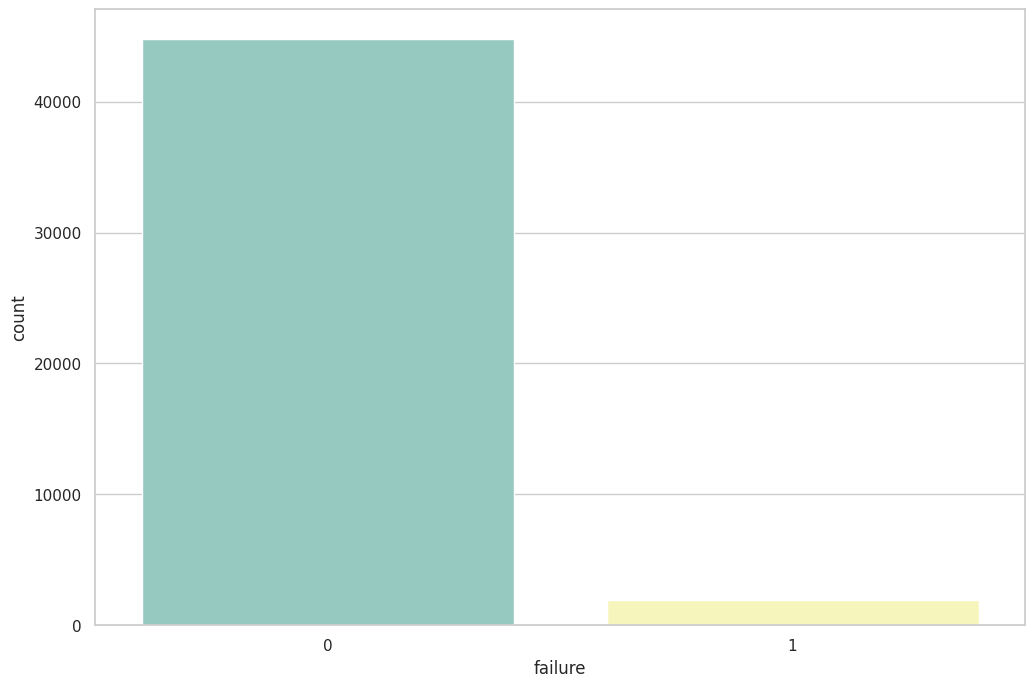

There are 1954 Failures or 4.177% of our companies, and 44822 Continued Operations or 95.823% of our companies


In [287]:
plt.figure(figsize=(12,8))
sns.countplot(data = valencia_data_filtered, x = 'failure', palette = "Set3")
valencia_data_filtered.failure.value_counts()


counts = valencia_data_filtered.failure.value_counts()
Disolucion = counts[1]
Continuacion = counts[0]
perc_failure = (Disolucion/(Disolucion + Continuacion))*100
perc_contin = (Continuacion/(Disolucion + Continuacion))*100
plt.show()
print('There are {} Failures or {:.3f}% of our companies, and {} Continued Operations or {:.3f}% of our companies'.format(
    Disolucion, perc_failure, Continuacion, perc_contin))

Let's create a pair of functions for a general report on all of our variables.

Variable Report:

In [288]:
def numerical_dqr(df):
  
  #select numerical columns
  numerical = df.select_dtypes(include = ['int', 'Int64', 'float']).columns.tolist()
  
  #data type
  data_types = pd.DataFrame(
    df[numerical].dtypes,
    columns=['Data Type'])
  
  #missing data
  missing_data = pd.DataFrame(
    df[numerical].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
    columns=['Unique Values'])
  for row in list(df[numerical].columns.values):
    unique_values.loc[row] = [df[numerical][row].nunique()]
    
    #number of records
  count_values = pd.DataFrame(
    columns=['Records'])
  for row in list(df[numerical].columns.values):
      count_values.loc[row] = [df[numerical][row].count()]
    
    #minimum value
  maximum_values = pd.DataFrame(
    columns=['Maximum Value'])
  for row in list(df[numerical].columns.values):
      maximum_values.loc[row] = [df[numerical][row].max()]
    
  #maximum value
  minimum_values = pd.DataFrame(
    columns=['Minimum Value'])
  for row in list(df[numerical].columns.values):
      minimum_values.loc[row] = [df[numerical][row].min()]
    
  #mean value
  mean_values = pd.DataFrame(
    columns=['Mean Value'])
  for row in list(df[numerical].columns.values):
      mean_values.loc[row] = [df[numerical][row].mean()]
    
  #first quartile
  quartile_1 = pd.DataFrame(
    columns=['1st Quartile'])
  for row in list(df[numerical].columns.values):
      quartile_1.loc[row] = [df[numerical][row].quantile(0.25)]
    
  #median
  median = pd.DataFrame(
  columns=['Median'])
  for row in list(df[numerical].columns.values):
    median.loc[row] = [df[numerical][row].quantile(0.5)]
    
  #third quartile
  quartile_3 = pd.DataFrame(
    columns=['3rd Quartile'])
  for row in list(df[numerical].columns.values):
    quartile_3.loc[row] = [df[numerical][row].quantile(0.75)]
    
  #join columns 
  dq_report_num = data_types.join(count_values).join(missing_data).join(unique_values).join(minimum_values).join(maximum_values).join(mean_values).join(quartile_1).join(median).join(quartile_3)
  
  #percentage missing
  dq_report_num['Missing %'] = (dq_report_num['Missing Values'] / len(df[numerical]) *100)
  
  # change order of columns
  dq_report_num = dq_report_num[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value', ]]

  #round
  dq_report_num[['Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']] =   dq_report_num[['Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']].round(1)
  
   
  #rreturn report
  return(dq_report_num)

In [289]:
def categorical_dqr(df):

  #select categorical columns
  categorical = df.select_dtypes(include = 'object').columns.tolist()

  #datatype
  data_types = pd.DataFrame(
    df[categorical].dtypes,
    columns=['Data Type'])
  
  #count
  count_values = pd.DataFrame(
      columns=['Records'])
  for row in list(valencia_data[categorical].columns.values):
    count_values.loc[row] = [valencia_data[categorical][row].count()]
  
   #missing data
  missing_data = pd.DataFrame(
    df[categorical].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
      columns=['Unique Values'])
  for row in list(valencia_data[categorical].columns.values):
    unique_values.loc[row] = [valencia_data[categorical][row].nunique()]

  #mode
  mode_values = pd.DataFrame(
      columns=['Mode'])
  for row in list(valencia_data[categorical].columns.values): 
    mode_values.loc[row] = [valencia_data[categorical][row].mode()[0]]
    mode = mode_values.loc[row]
  
  #mode frequency
  listModeFreq = []
  for row in categorical:
    mode = valencia_data[row].mode().iat[0]
    ModeFreq = valencia_data[row].value_counts()[mode]
    #print(x, mode, raw[x].value_counts()[mode])
    listModeFreq .append(ModeFreq )
  listModeFreq  = np.array(listModeFreq )
    
  
   #create data quality report
  dq_report_cat = data_types.join(missing_data).join(count_values).join(unique_values).join(mode_values)
  dq_report_cat['Mode freq.'] = listModeFreq 
  dq_report_cat['Mode %'] = (dq_report_cat['Mode freq.'] / dq_report_cat['Records']*100) .astype('float')
  dq_report_cat['Missing %'] = (dq_report_cat['Missing Values'] / len(valencia_data[categorical]) *100)

  #change order of columns
  dq_report_cat = dq_report_cat[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mode', 'Mode freq.', 'Mode %']]
  dq_report_cat[['Missing %', 'Mode %']] =   dq_report_cat[['Missing %'	,  'Mode %']].round(1  )

  #return report
  return(dq_report_cat)
     

In [290]:
numerical_dqr(valencia_data_filtered)

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
Ano,int64,46776,10,0,0.0,2020.1,2015.0,2018.0,2020.0,2022.0,2.024000e+03
Mes,int64,46776,12,0,0.0,5.6,1.0,2.0,5.0,9.0,1.200000e+01
Poblacion,int64,46776,1472,0,0.0,265343.2,94.0,10815.0,29825.0,789744.0,8.076930e+05
capital,float64,46776,2822,0,0.0,101415.4,0.0,3000.0,3000.0,3200.0,1.250000e+09
duration,float64,46776,1705,0,0.0,3.3,-0.6,1.7,3.8,5.0,5.000000e+00
failure,int64,46776,2,0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00
latitude,float64,46776,20185,0,0.0,39.4,38.8,39.4,39.5,39.5,3.980000e+01
longitude,float64,46776,20108,0,0.0,-0.4,-1.4,-0.5,-0.4,-0.4,-1.000000e-01
socio_unico,int64,46776,2,0,0.0,0.8,0.0,1.0,1.0,1.0,1.000000e+00
Sin Actividad,int64,46776,275,0,0.0,1272.2,0.0,45.0,190.0,2829.0,6.356000e+03


In [291]:
categorical_dqr(valencia_data_filtered)

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
company_name,object,46776,46623,0,0.0,ANONA PREMIUM SL.,8,0.0
municipio,object,46776,236,0,0.0,46250 València,14600,31.2


From our variable report we obtain the following information:
1. We have zero missing values
2. Capital and Poblacion have very high max values and appear to be very right-skewed. It is very likely that we have outliers for both of these feature.
Since we obtained the population values from a governmental website i will not do anything with them but i will make a more formal check and potentially eliminate outliers for capital in the future.
3. Duration has some invalid negative values that are due to improper date entries.

Let's define some useful functions to check distributions of data versus our target event:

In [293]:
def distribution_checker(data, xlabel, additional_layers=None):
    
    if additional_layers is None:
        additional_layers = []

    # Combine xlabel with additional layers for grouping
    group_by_columns = [xlabel] + additional_layers + ['failure']
    
    # Group the data by xlabel, additional layers, and failure
    grouped = data.groupby(group_by_columns)['company_name'].count().reset_index()
    
    # Pivot the grouped data to get 'failure' as columns
    pivot = grouped.pivot_table(index=group_by_columns[:-1], columns='failure', values='company_name', fill_value=0)
    
    # Rename columns for clarity (0 = No failure, 1 = Failure)
    pivot.columns = ['continuation', 'disolution']
    
    # Calculate total count of each group (sum of no_failure and failure)
    pivot['total'] = pivot['continuation'] + pivot['disolution']
    
    # Calculate percentages for each failure status
    pivot['perc_failure'] = ((pivot['disolution'] / pivot['total']) * 100).round(1)
    pivot['perc_no_failure'] = ((pivot['continuation'] / pivot['total']) * 100).round(1)
    
    # Dropping the unnecessary columns for a cleaner output
    pivot = pivot.drop(['continuation', 'disolution'], axis=1)
    
    return pivot

In [294]:
def distribution_checker_binary(data, binary_columns, additional_layers=None):
 
    if additional_layers is None:
        additional_layers = []

    # Initialize a list to store results
    results = []

    for column in binary_columns:
        # Combine column with additional layers for grouping
        group_by_columns = [column] + additional_layers + ['failure']
        
        # Grouping the data by binary column, additional layers, and failure
        grouped = data.groupby(group_by_columns)['company_name'].count().reset_index()
        
        # Pivot the grouped data to get 'failure' as columns
        pivot = grouped.pivot_table(index=group_by_columns[:-1], columns='failure', values='company_name', fill_value=0)
        
        # Rename columns for clarity (0 = No failure, 1 = Failure)
        pivot.columns = ['continuation', 'disolution']
        
        # Calculate total count of each group (sum of no_failure and failure)
        pivot['total'] = pivot['continuation'] + pivot['disolution']
        
        # Calculate percentages for each failure status
        pivot['perc_failure'] = ((pivot['disolution'] / pivot['total']) * 100).round(1)
        pivot['perc_no_failure'] = ((pivot['continuation'] / pivot['total']) * 100).round(1)
        
        # Dropping the unnecessary columns for a cleaner output
        pivot = pivot[['total', 'perc_failure', 'perc_no_failure']]
        
        # Add a column to identify the binary column and additional layers
        pivot['sector'] = column
        for layer in additional_layers:
            pivot[layer] = pivot.index.get_level_values(layer)
        
        # Reset index to turn the index into a column
        pivot = pivot.reset_index(drop=True)
        
        # Rearranging columns as specified
        pivot = pivot[['sector'] + additional_layers + ['total', 'perc_failure', 'perc_no_failure']]
        
        # Append the pivot result to the results list
        results.append(pivot)
    
    # Combine all results into a single DataFrame
    combined_result = pd.concat(results, axis=0, ignore_index=True)
    
    return combined_result

In [295]:
def distribution_checker_continuous(data, continuous_columns, bins=10, additional_layers=None):
    
    if additional_layers is None:
        additional_layers = []
    
    # Ensure continuous_columns is a list, even if a single column is passed as a string
    if isinstance(continuous_columns, str):
        continuous_columns = [continuous_columns]
    
    # Initialize a list to store results
    results = []
    
    for column in continuous_columns:
        # Create bin edges based on the specified number of bins
        bin_edges = np.linspace(data[column].min(), data[column].max(), bins + 1)
        bin_labels = [f'Bin_{i} ({bin_edges[i]:.2f} - {bin_edges[i+1]:.2f})' for i in range(bins)]
        
        # Bin the continuous column
        data['binned_' + column] = pd.cut(data[column], bins=bin_edges, labels=bin_labels, include_lowest=True)
        
        # Combine binned column with additional layers for grouping
        group_by_columns = ['binned_' + column] + additional_layers + ['failure']
        
        # Grouping the data by binned column, additional layers, and failure
        grouped = data.groupby(group_by_columns)['company_name'].count().reset_index()
        
        # Pivot the grouped data to get 'failure' as columns
        pivot = grouped.pivot_table(index=group_by_columns[:-1], columns='failure', values='company_name', fill_value=0)
        
        # Rename columns for clarity (0 = No failure, 1 = Failure)
        pivot.columns = ['continuation', 'disolution']
        
        # Calculate total count of each group (sum of continuation and disolution)
        pivot['total'] = pivot['continuation'] + pivot['disolution']
        
        # Calculate percentages for each failure status
        pivot['perc_failure'] = ((pivot['disolution'] / pivot['total']) * 100).round(1)
        pivot['perc_no_failure'] = ((pivot['continuation'] / pivot['total']) * 100).round(1)
        
        # Dropping the unnecessary columns for a cleaner output
        pivot = pivot[['total', 'perc_failure', 'perc_no_failure']]
        
        # Add a column to identify the continuous column and additional layers
        pivot['sector'] = column
        for layer in additional_layers:
            pivot[layer] = pivot.index.get_level_values(layer)
        
        # Reset index to turn the index into a column
        pivot = pivot.reset_index()
        
        # Rearranging columns as specified
        pivot = pivot[['sector'] + additional_layers + ['total', 'perc_failure', 'perc_no_failure']]
        
        # Append the pivot result to the results list
        results.append(pivot)
    
    # Combine all results into a single DataFrame
    combined_result = pd.concat(results, axis=0, ignore_index=True)
    
    return combined_result

In [296]:
def plot_distributions(data, continuous_columns, hue='failure', kind='kde', fill=True, height=6, aspect=1.5, palette='deep'):
    # Create a grid of subplots
    num_vars = len(continuous_columns)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate the number of rows needed
    
    # Set up the matplotlib figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * height * aspect, num_rows * height), constrained_layout=True)
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    for i, column in enumerate(continuous_columns):
        # Create the KDE plot
        sns.kdeplot(
            data=data,
            x=column,
            hue=hue,
            fill=fill,
            palette=palette,
            ax=axes[i]  # Pass the specific subplot axis
        )
        
        # Set titles and labels
        axes[i].set_title(f'Distribution of {column} by {hue}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Density')
    
    # Hide any unused subplots
    for j in range(len(continuous_columns), len(axes)):
        axes[j].axis('off')
    
    # Show the plot
    plt.show()

Distribution of Continuous Variables: 

Let's examine the distribution of our continuous variables plotted against our target class of company failure.

Capital:

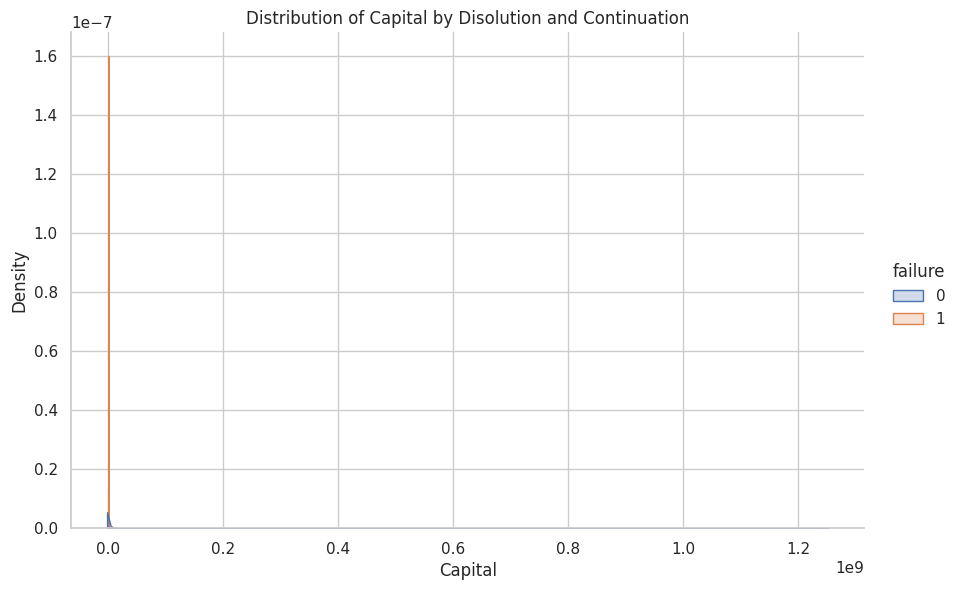

In [297]:

sns.displot(
    data=valencia_data_filtered, 
    x='capital',
    hue='failure', 
    kind='kde', 
    fill=True, 
    height=6, 
    aspect=1.5, 
    palette='deep'
)

plt.title('Distribution of Capital by Disolution and Continuation')
plt.xlabel('Capital')
plt.ylabel('Density')

plt.show()

Here we observe a significant right tail corresponding to the potential outlier we mentioned before. We can further examine this with a violin plot. There is also no clear difference in distibution of capital per class in the chart.

<Axes: xlabel='failure', ylabel='capital'>

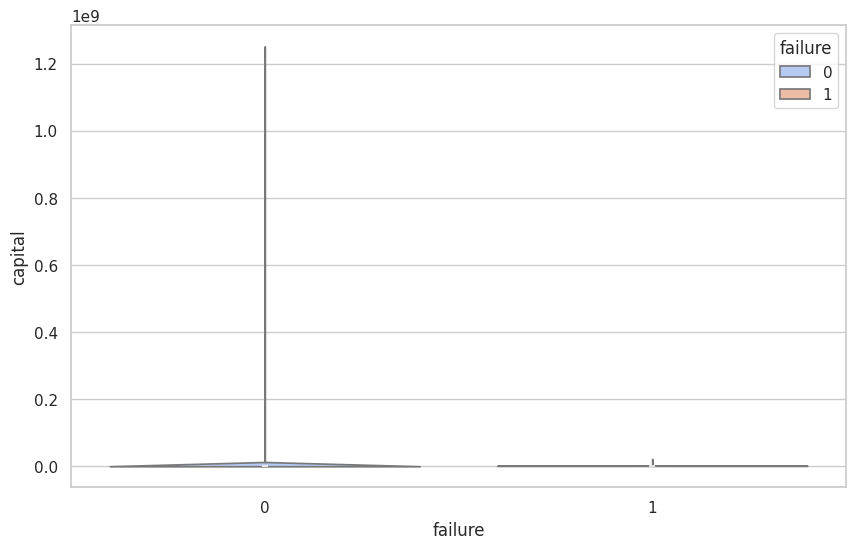

In [298]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='failure', y='capital', data = valencia_data_filtered, 
               hue ='failure',  # Shows individual data points inside the violin
               palette='coolwarm')

Again, here we see these massive outliers that squash our plot to be basically unreadable. 

Longitude & Latitude:

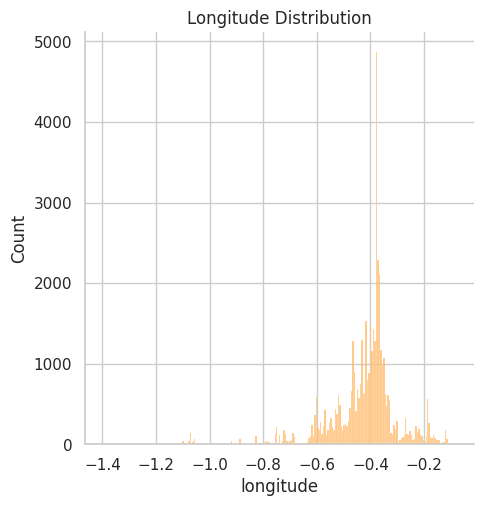

In [299]:
ax = sns.displot(valencia_data_filtered['longitude'], color = '#FFB45A')
ax.set(title = 'Longitude Distribution')
plt.show()

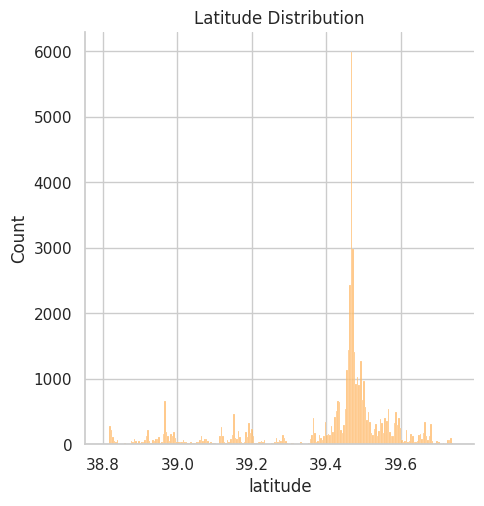

In [300]:
ax = sns.displot(valencia_data_filtered['latitude'], color = '#FFB45A')
ax.set(title = 'Latitude Distribution')
plt.show()

The distributions of longitude and latitude look good as expected considering we restricted their values earlier on in the model. Let's try and create a usefil plot of longitude and latitude for classes.

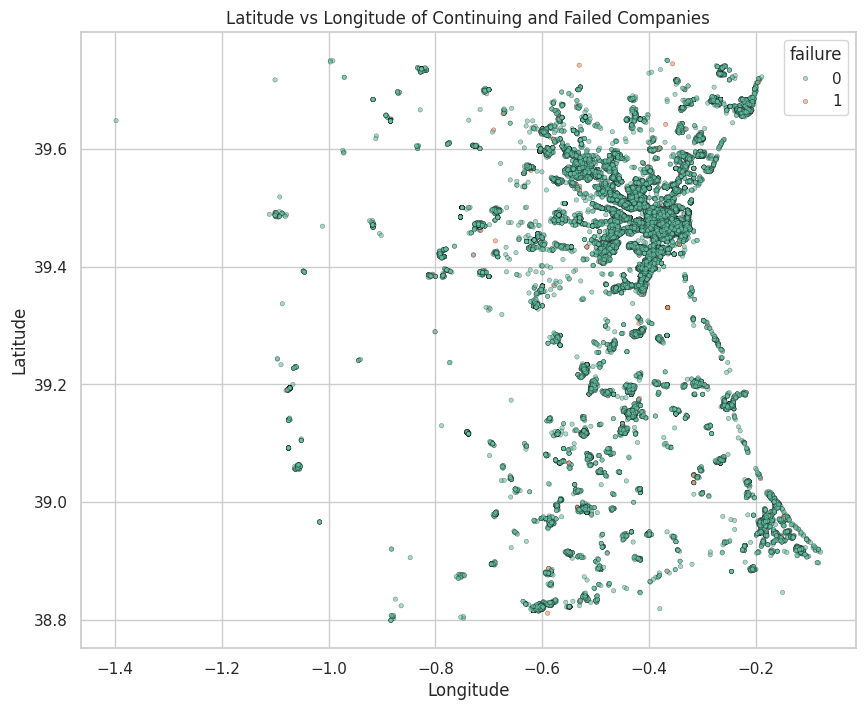

In [301]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=valencia_data_filtered['longitude'],
    y=valencia_data_filtered['latitude'],
    hue=valencia_data_filtered['failure'],  # Additional hue based on another column
    palette='Set2',  # Using Seaborn's color palette
    marker='o',
    s=10,
    edgecolor='black',  # Edge color for clarity
    alpha=0.6,  # Transparency for better visualization
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude of Continuing and Failed Companies')

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.show()

There is no clear pattern of failure for longitude and latitude. We can create a more interactive chart here with folium to observe further.  

In [302]:
# Initialize the map
m = folium.Map(location=[39.47, -0.38], zoom_start=12)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for index, row in valencia_data_filtered.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row.get('popup_info', 'No Info'),
        icon=folium.Icon(color='red' if row['failure'] == 1 else 'green')
    ).add_to(marker_cluster)

# Save map to an HTML file
m.save('valencia_map_clustered.html')

Year

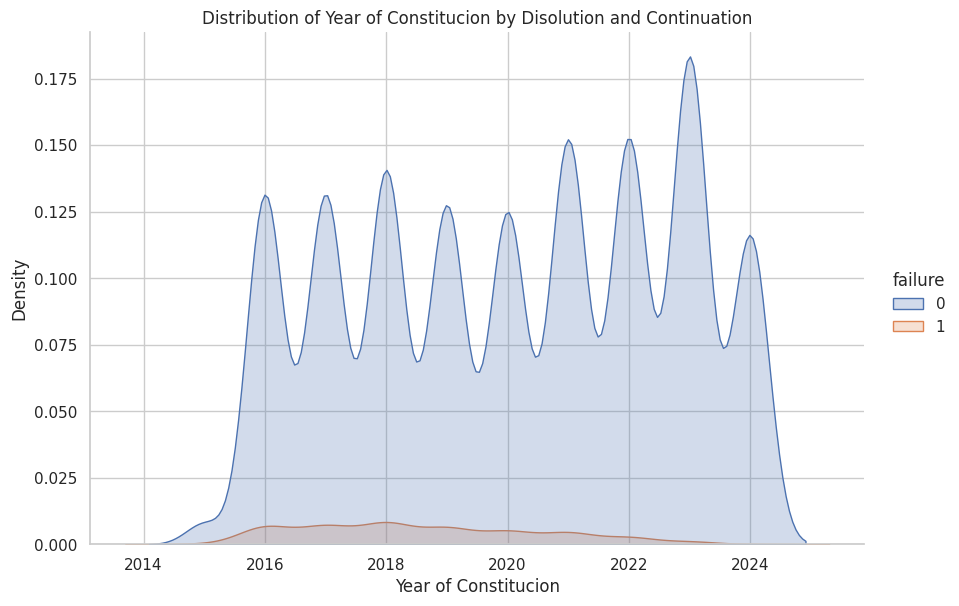

In [304]:
sns.displot(
    data=valencia_data_filtered, 
    x='Ano',
    hue='failure', 
    kind='kde', 
    fill=True, 
    height=6, 
    aspect=1.5, 
    palette='deep'
)

plt.title('Distribution of Year of Constitucion by Disolution and Continuation')
plt.xlabel('Year of Constitucion')
plt.ylabel('Density')

plt.show()

Mes

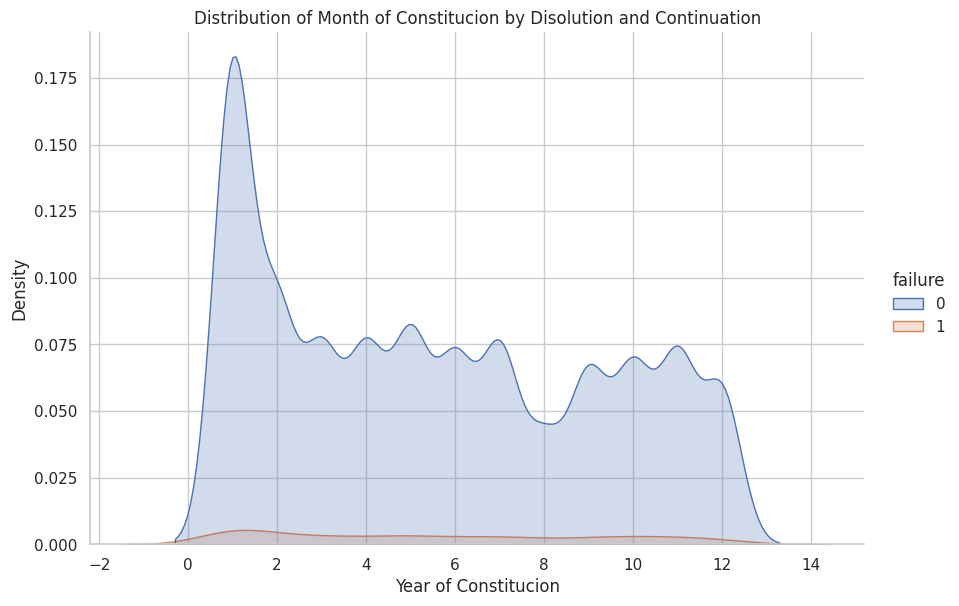

In [305]:
sns.displot(
    data=valencia_data_filtered, 
    x='Mes',
    hue='failure', 
    kind='kde', 
    fill=True, 
    height=6, 
    aspect=1.5, 
    palette='deep'
)

plt.title('Distribution of Month of Constitucion by Disolution and Continuation')
plt.xlabel('Year of Constitucion')
plt.ylabel('Density')

plt.show()

There are no clear patterns for month or year in relation to our target variable.

Duration:

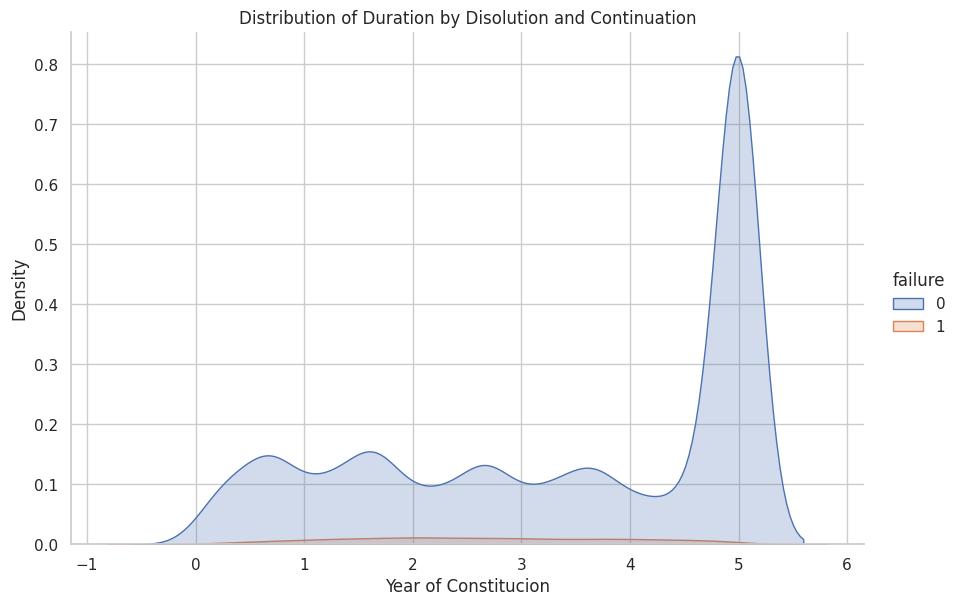

In [345]:
sns.displot(
    data=valencia_data_filtered, 
    x='duration',
    hue='failure', 
    kind='kde', 
    fill=True, 
    height=6, 
    aspect=1.5, 
    palette='deep'
)

plt.title('Distribution of Duration by Disolution and Continuation')
plt.xlabel('Year of Constitucion')
plt.ylabel('Density')

plt.show()

Population

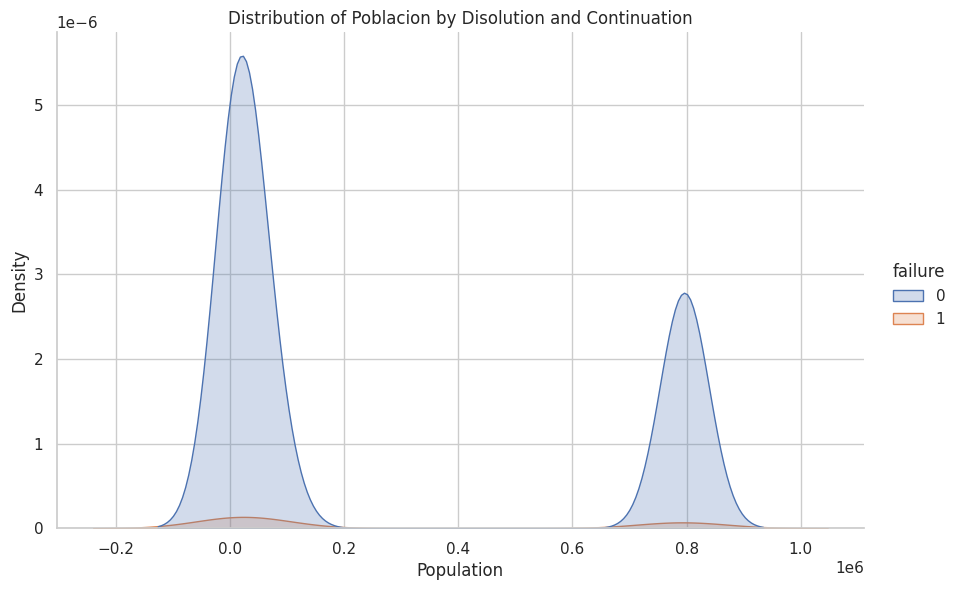

In [307]:
sns.displot(
    data=valencia_data_filtered, 
    x='Poblacion',
    hue='failure', 
    kind='kde', 
    fill=True, 
    height=6, 
    aspect=1.5, 
    palette='deep'
)

plt.title('Distribution of Poblacion by Disolution and Continuation')
plt.xlabel('Population')
plt.ylabel('Density')

plt.show()

It is interesting that our population seems to be split into two groups but there still doesn't appear to be any difference between our target class

Categorical Variables:

Barrio:

In [ ]:
distribution_checker(valencia_data_filtered, 'barrio')

We notice that the muncipio Valencia has significantly more companies than all other muncipios but there is not a signifcant ditribution change in overall failure percentage per municipio.

Sectors:

In [312]:

binary_columns = [col for col in valencia_data_filtered.columns if 'sector_' in col and col != 'sector_count']

distribution_checker_binary(valencia_data_filtered, binary_columns)

,sector,total,perc_failure,perc_no_failure
0,sector_A,38473.0,4.2,95.8
1,sector_A,7823.0,4.0,96.0
2,sector_B,46210.0,4.2,95.8
3,sector_B,86.0,7.0,93.0
4,sector_C,20761.0,4.2,95.8
5,sector_C,25535.0,4.2,95.8
6,sector_D,45284.0,4.2,95.8
7,sector_D,1012.0,5.6,94.4
8,sector_E,46050.0,4.2,95.8
9,sector_E,246.0,2.4,97.6


Sector B (Manufacture of beverages has the highest proportion of failures but it does not have a significantly high count of companies)

Sector Count:

In [313]:
distribution_checker(valencia_data_filtered, 'sector_count')

,total,perc_failure,perc_no_failure
sector_count,,,
1,16529.0,4.4,95.6
2,17545.0,4.0,96.0
3,7758.0,4.2,95.8
4,3009.0,3.8,96.2
5,1022.0,4.8,95.2
6,341.0,3.5,96.5
7,78.0,5.1,94.9
8,14.0,0.0,100.0


There does not appear to be significiant different in rates of failure depending on the amount of sectors businesses are involved in based on our classifications.

Socio Unico:

In [324]:
distribution_checker(valencia_data_filtered, 'socio_unico')

,total,perc_failure,perc_no_failure
socio_unico,,,
0,10899.0,5.4,94.6
1,35397.0,3.8,96.2


Perhaps there is a small difference in the probabiity of failure if a company is a sole proprietorship but it could simply be due to chance.